![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Construcción e implementación de modelo Random Forest
En este notebook aprenderá a construir e implementar un modelo de Random Forest usando la librería especializada sklearn. Así mismo aprenderá a calibrar los parámetros del modelo y a obtener la importancia de las variables para la predicción. 

## Instrucciones Generales:

El modelo de Random Forest que construirá por medio de este notebook deberá predecir si el salario de un beisbolista es alto (>425) dadas las variables de desempeño en su carrera. Por esta razón, los datos a usar en el notebook son los de las Grandes Ligas de Béisbol de las temporadas 1986 y 1987, para más detalles: https://rdrr.io/cran/ISLR/man/Hitters.html. 
   
Para realizar la actividad, solo siga las indicaciones asociadas a cada celda del notebook. 

## Importar base de datos y librerías

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

# Carga de datos de archivos .csv
url = 'https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/hitters.csv'
hitters = pd.read_csv(url)

# Eliminación filas con observaciones nulas
hitters.dropna(inplace=True)
hitters.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


## Codificar variables categóricas

In [3]:
# Codificación de las variables categoricas
hitters['League'] = pd.factorize(hitters.League)[0]
hitters['Division'] = pd.factorize(hitters.Division)[0]
hitters['NewLeague'] = pd.factorize(hitters.NewLeague)[0]

In [4]:
hitters['Division']

1      0
2      0
3      1
4      1
5      0
      ..
317    1
318    1
319    0
320    1
321    0
Name: Division, Length: 263, dtype: int64

In [5]:
# Selección de variables predictoras
feature_cols = hitters.columns[hitters.columns.str.startswith('C') == False].drop('Salary')
feature_cols

Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'League',
       'Division', 'PutOuts', 'Assists', 'Errors', 'NewLeague'],
      dtype='object')

## Definir las varibles del problema - Predictoras y varible de respuesta

In [6]:
# Separación de variables predictoras (X) y variable de interes (y)
X = hitters[feature_cols]
y = (hitters.Salary > 425).astype(int)

## Implementación modelo usando *Sklearn*

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Definición de modelo Random Forest para un problema de clasificación
clf = RandomForestClassifier()
clf

RandomForestClassifier()

In [8]:
#Impresión de desempeño del modelo usando la función cross_val_score  (más detalles en https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)
pd.Series(cross_val_score(clf, X, y, cv=10)).describe()

count    10.000000
mean      0.832194
std       0.055925
min       0.769231
25%       0.778846
50%       0.829772
75%       0.876425
max       0.925926
dtype: float64

## Calibración de parámetros

### Calibración de n_estimators

**n_estimators** es la cantidad de árboles a contruir dentro del bosque aleatorio.

In [9]:
# Creación de lista de valores para iterar sobre diferentes valores de n_estimators
estimator_range = range(10, 310, 10)

# Definición de lista para almacenar la exactitud (accuracy) promedio para cada valor de n_estimators
accuracy_scores = []

# Uso de un 5-fold cross-validation para cada valor de n_estimators
for estimator in estimator_range:
    clf = RandomForestClassifier(n_estimators=estimator, random_state=1, n_jobs=-1)
    accuracy_scores.append(cross_val_score(clf, X, y, cv=5, scoring='accuracy').mean())

Text(0, 0.5, 'Accuracy')

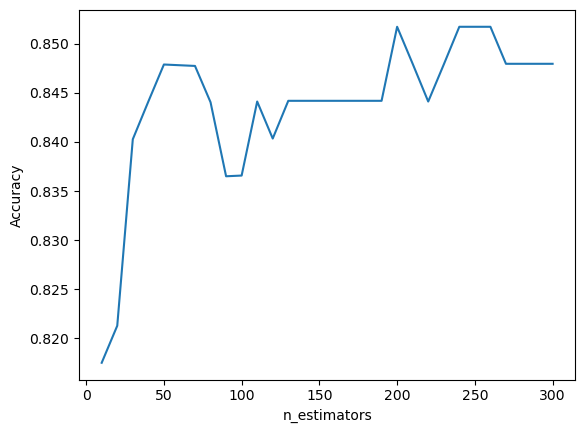

In [10]:
# Gráfica del desempeño del modelo vs la cantidad de n_estimators
plt.plot(estimator_range, accuracy_scores)
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')

### Calibracióm max_features

**max_features** es el número de variables que se deben considerar en cada árbol.

In [11]:
# Creación de lista de valores para iterar sobre diferentes valores de max_features
feature_range = range(1, len(feature_cols)+1)

# Definición de lista para almacenar la exactitud (accuracy) promedio para cada valor de max_features
accuracy_scores = []

# Uso de un 10-fold cross-validation para cada valor de max_features
for feature in feature_range:
    clf = RandomForestClassifier(n_estimators=200, max_features=feature, random_state=1, n_jobs=-1)
    accuracy_scores.append(cross_val_score(clf, X, y, cv=5, scoring='accuracy').mean())

Text(0, 0.5, 'Accuracy')

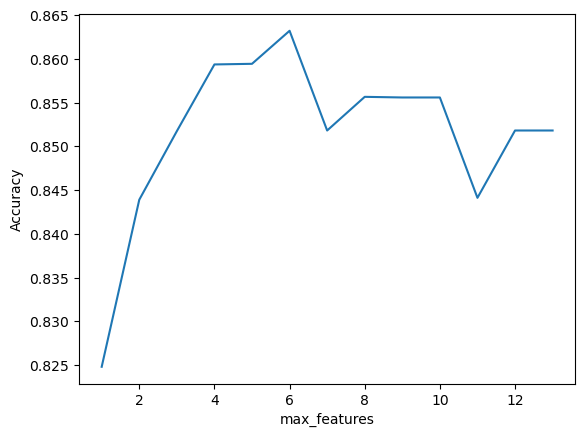

In [12]:
# Gráfica del desempeño del modelo vs la cantidad de max_features
plt.plot(feature_range, accuracy_scores)
plt.xlabel('max_features')
plt.ylabel('Accuracy')

## Implementación de un Random Forest con los mejores parámetros

In [13]:
# Definición del modelo con los parámetros max_features=6 y n_estimators=200 
clf = RandomForestClassifier(n_estimators=200, max_features=6, random_state=1, n_jobs=-1)
clf.fit(X, y)

RandomForestClassifier(max_features=6, n_estimators=200, n_jobs=-1,
                       random_state=1)

In [14]:
# Impresión de resultados de desemepeño del modelo
pd.DataFrame({'feature':feature_cols, 'importance':clf.feature_importances_}).sort_values('importance')

,feature,importance
8,Division,0.006081
7,League,0.008834
12,NewLeague,0.009709
11,Errors,0.032638
10,Assists,0.040503
2,HmRun,0.047118
9,PutOuts,0.051506
0,AtBat,0.078822
3,Runs,0.080185
5,Walks,0.082160
